In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#TB_df

In [3]:
LD_df = pd.read_csv("LD/viz_dataset.csv.gz",index_col=[0])
LD_df['Species']='L. donovani'
TC_df = pd.read_csv("TC/viz_dataset.csv.gz",index_col=[0])
TC_df['Species']='T. cruzi'
TB_df = pd.read_csv("TB/viz_dataset.csv.gz",index_col=[0])
TB_df['Species']='T. brucei'

TB_df['ribo']=TB_df['log_mean_ribo']
TB_df['mRNA']=TB_df['log_mean_rna']

TC_df['ribo']=TC_df['log_mean_ribo']
TC_df['mRNA']=TC_df['log_mean_rna']

LD_df['ribo']=LD_df['log_mean_ribo']
LD_df['mRNA']=LD_df['log_mean_rna']

In [4]:
df = pd.concat([
    TB_df[['sequence_3p', 'TE', 'ribo', 'mRNA', 'Species']],
    TC_df[['sequence_3p', 'TE', 'ribo', 'mRNA', 'Species']],
    LD_df[['sequence_3p', 'TE', 'ribo', 'mRNA', 'Species']] ])
df.head()  

,sequence_3p,TE,ribo,mRNA,Species
Tb927.3.5260,TGAACAGTTGTGAAGTTAGGACGGGGCGTATGTTGCCTTCCTTTTG...,0.310868,1.470735,1.816461,T. brucei
Tb927.3.5270,AGTGGGCTAACAAACACGGTAGTCGCAACGATAATAACATCGAGCT...,0.324178,1.868601,2.187651,T. brucei
Tb927.3.5280,TTGGTGTGGGAGAGAATGATTCTAAATGACAAGGGCTGATCATGTG...,0.345459,1.956123,2.233663,T. brucei
Tb927.3.5290,ATGCGTTGAAGAAGGAGAAGCGAATTTTAAGTTTCATGAGTGTGGT...,0.279054,1.277278,1.689493,T. brucei
Tb927.3.5300,TGCTATTGGTAGCATTTTCGTTGTTTCATTTCGTAACCTCCTTGAG...,0.545400,2.039364,1.960278,T. brucei


In [5]:
df['len_3p']=np.log10(df['sequence_3p'].str.len())
df['len_3bp']=df['sequence_3p'].str.len()

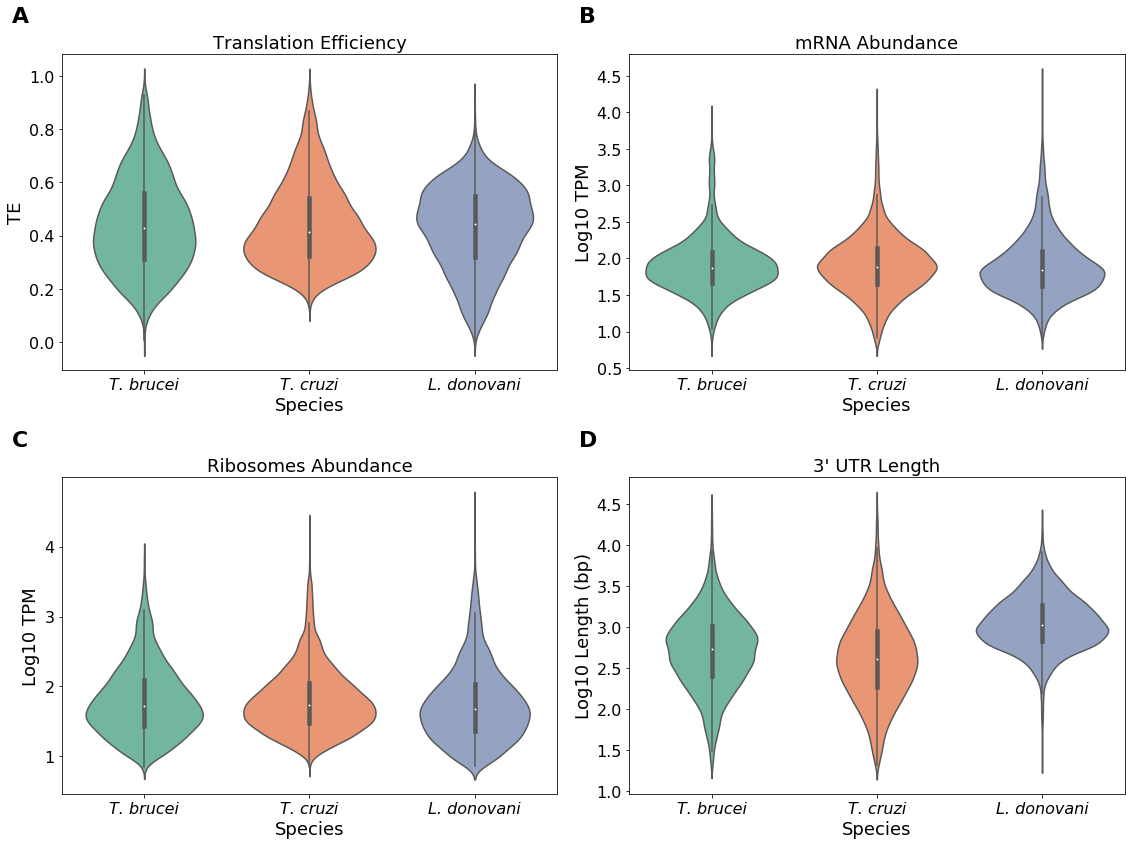

In [6]:
plt.rcParams.update({'font.size': 16})
fig, axes = plt.subplots(figsize=(16,12), nrows=2, ncols=2)
axes = axes.flatten()

# Create the violin plots as before
sns.violinplot(data=df, y='TE', x='Species', ax=axes[0], palette='Set2')
axes[0].set_title('Translation Efficiency', fontsize=18)
axes[0].set_ylabel('TE', fontsize=18)
axes[0].set_xlabel('Species', fontsize=18)
axes[0].set_xticklabels(['T. brucei','T. cruzi','L. donovani'], style='italic')
axes[0].text(-0.1, 1.1, 'A', fontsize=22, weight='bold', transform=axes[0].transAxes)

sns.violinplot(data=df, y='mRNA', x='Species', ax=axes[1], palette='Set2')
axes[1].set_ylabel('Log10 TPM', fontsize=18)
axes[1].set_title('mRNA Abundance', fontsize=18)
axes[1].set_xlabel('Species', fontsize=18)
axes[1].set_xticklabels(['T. brucei','T. cruzi','L. donovani'], style='italic')
axes[1].text(-0.1, 1.1, 'B', fontsize=22, weight='bold', transform=axes[1].transAxes)

sns.violinplot(data=df, y='ribo', x='Species', ax=axes[2], palette='Set2')
axes[2].set_ylabel('Log10 TPM', fontsize=18)
axes[2].set_title("Ribosomes Abundance", fontsize=18)
axes[2].set_xlabel('Species', fontsize=18)
axes[2].set_xticklabels(['T. brucei','T. cruzi','L. donovani'], style='italic')
axes[2].text(-0.1, 1.1, 'C', fontsize=22, weight='bold', transform=axes[2].transAxes)

sns.violinplot(data=df, y='len_3p', x='Species', ax=axes[3], palette='Set2')
axes[3].set_ylabel('Log10 Length (bp)', fontsize=18)  # Fixed: was using axes[2] instead of axes[3]
axes[3].set_title("3' UTR Length", fontsize=18)       # Fixed: was using axes[2] instead of axes[3]
axes[3].set_xlabel('Species', fontsize=18)            # Fixed: was using axes[2] instead of axes[3]
axes[3].set_xticklabels(['T. brucei','T. cruzi','L. donovani'], style='italic')
axes[3].text(-0.1, 1.1, 'D', fontsize=22, weight='bold', transform=axes[3].transAxes)

plt.tight_layout()
#plt.savefig('Fig 1B.svg')
#plt.savefig('Fig 1B.png')
plt.show()

In [7]:
cols=['sequence_3p', 'Species','utr_3_count_A', 'utr_3_count_T', 'utr_3_count_C', 'utr_3_count_G',
      'third_base_A', 'third_base_T', 'third_base_G', 'third_base_C',]

In [8]:
df2 = pd.concat([
    TB_df[cols],
    TC_df[cols],
    LD_df[cols]])
df2.head()  

,sequence_3p,Species,utr_3_count_A,utr_3_count_T,utr_3_count_C,utr_3_count_G,third_base_A,third_base_T,third_base_G,third_base_C
Tb927.3.5260,TGAACAGTTGTGAAGTTAGGACGGGGCGTATGTTGCCTTCCTTTTG...,T. brucei,0.173913,0.451691,0.200483,0.173913,0.097163,0.092908,0.081560,0.061702
Tb927.3.5270,AGTGGGCTAACAAACACGGTAGTCGCAACGATAATAACATCGAGCT...,T. brucei,0.205882,0.379412,0.200000,0.214706,0.085890,0.092025,0.102249,0.053170
Tb927.3.5280,TTGGTGTGGGAGAGAATGATTCTAAATGACAAGGGCTGATCATGTG...,T. brucei,0.192802,0.406170,0.177378,0.223650,0.064350,0.102960,0.078507,0.087516
Tb927.3.5290,ATGCGTTGAAGAAGGAGAAGCGAATTTTAAGTTTCATGAGTGTGGT...,T. brucei,0.190476,0.359307,0.229437,0.220779,0.080423,0.089242,0.102293,0.061376
Tb927.3.5300,TGCTATTGGTAGCATTTTCGTTGTTTCATTTCGTAACCTCCTTGAG...,T. brucei,0.181132,0.362264,0.264151,0.192453,0.071291,0.055877,0.131021,0.075145


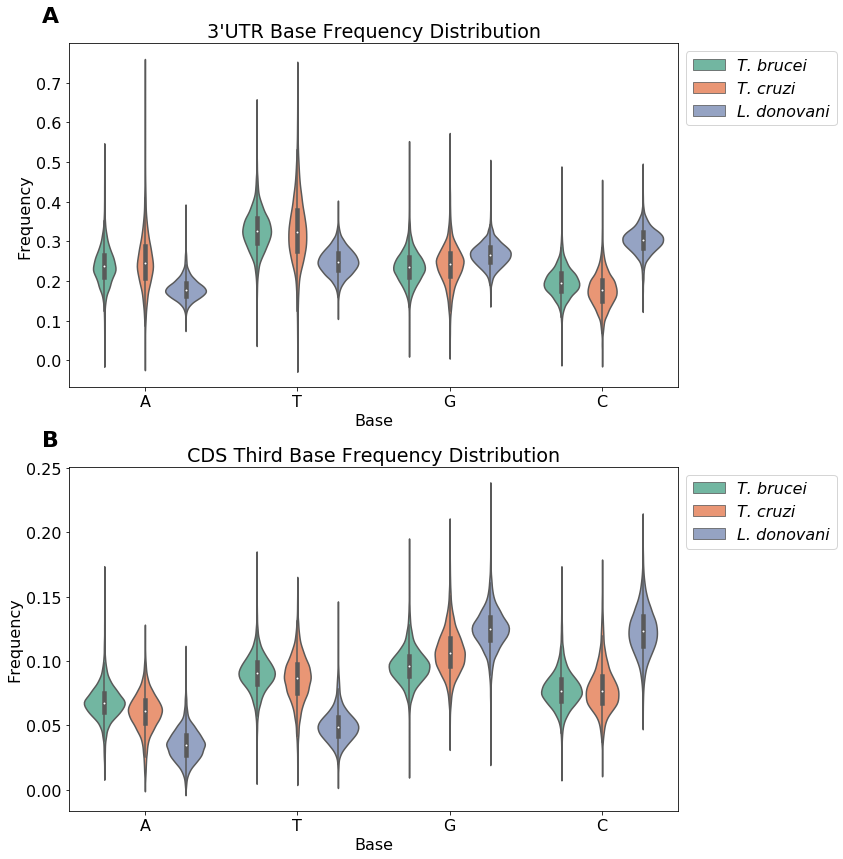

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})
fig,axes=plt.subplots( figsize=(12,12) , nrows=2)
ax = axes[0]
melted_df = pd.melt(df2, 
                    id_vars=['sequence_3p', 'Species'],
                    value_vars=['utr_3_count_A', 'utr_3_count_T', 'utr_3_count_G', 'utr_3_count_C'],
                    var_name='Base',
                    value_name='frequency')

# Clean base names by removing '_freq'
melted_df['Base'] = melted_df['Base'].str.replace('utr_3_count_', '')
sns.violinplot(data=melted_df, x='Base', y='frequency', hue='Species',  palette='Set2',ax=ax)
ax.set_title("3'UTR Base Frequency Distribution")
ax.set_ylabel('Frequency')
#ax.set_xticklabels(['T. brucei','T. cruzi','L. donovani'], style='italic')
# Italicize species names
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
legend = ax.get_legend()
for t in legend.get_texts():
   t.set_style('italic')


ax = axes[1]
# Melt the dataframe
melted_df = pd.melt(df2, 
                    id_vars=['sequence_3p', 'Species'],
                    value_vars=['third_base_A', 'third_base_T', 'third_base_G', 'third_base_C'],
                    var_name='Base',
                    value_name='frequency')

# Clean base names by removing '_freq'
melted_df['Base'] = melted_df['Base'].str.replace('third_base_', '')
sns.violinplot(data=melted_df, x='Base', y='frequency', hue='Species',  palette='Set2',ax=ax)
ax.set_title('CDS Third Base Frequency Distribution')
ax.set_ylabel('Frequency')
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')

legend = ax.get_legend()
for t in legend.get_texts():
   t.set_style('italic')

fig.text(0.06, 0.98,  'A', fontsize=22, weight='bold')
fig.text(0.06, 0.49,  'B', fontsize=22, weight='bold')
plt.tight_layout()
plt.show()

In [10]:
#df['TE']


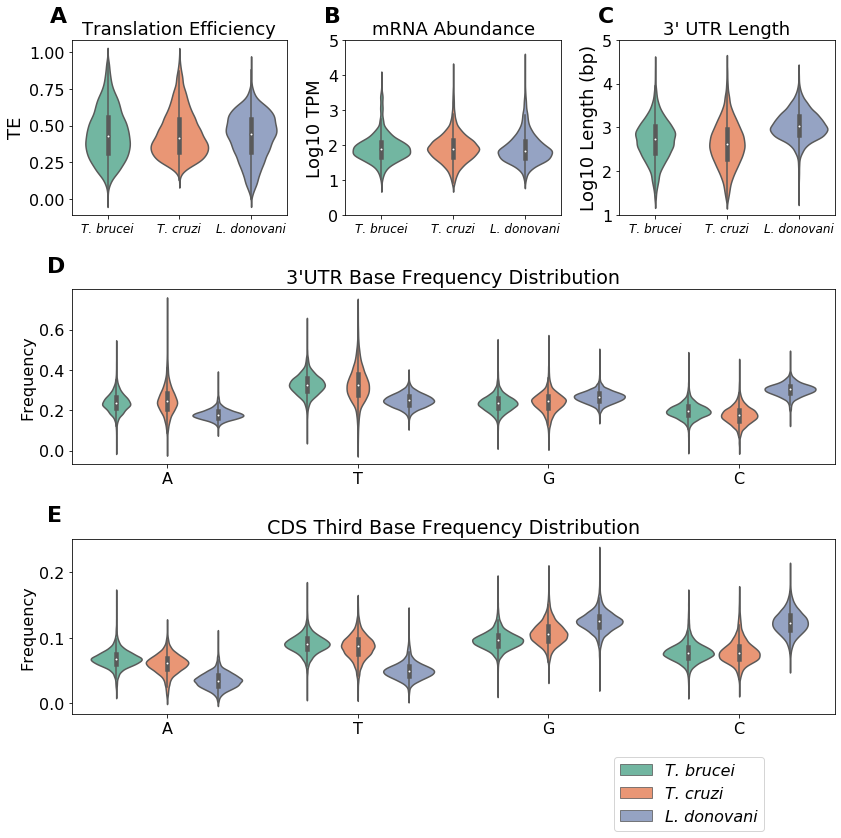

In [11]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create figure
fig = plt.figure(figsize=(12, 12))  # Made wider to accommodate 3 panels in first row

# Create grid specification
gs = gridspec.GridSpec(3, 3, height_ratios=[1, 1, 1])

# Create axes
axes = []
# First row - three panels
axes.append(fig.add_subplot(gs[0, 0]))  # ax[0]
axes.append(fig.add_subplot(gs[0, 1]))  # ax[1]
axes.append(fig.add_subplot(gs[0, 2]))  # ax[2]
# Second row - one panel spanning all columns
axes.append(fig.add_subplot(gs[1, :]))  # ax[3]
# Third row - one panel spanning all columns
axes.append(fig.add_subplot(gs[2, :]))  # ax[4]

# Example usage:
#axes[0].set_title('Panel 1')
#axes[1].set_title('Panel 2')
#axes[2].set_title('Panel 3')
#axes[3].set_title('Panel 4')
#axes[4].set_title('Panel 5')



sns.violinplot(data=df,y='TE',x='Species',ax=axes[0],  palette='Set2')
axes[0].set_title('Translation Efficiency',fontsize=18)
axes[0].set_ylabel('TE',fontsize=18)
axes[0].set_xlabel('',fontsize=18)
axes[0].set_xticklabels(['T. brucei','T. cruzi','L. donovani'], style='italic',fontsize=12)


sns.violinplot(data=df,y='mRNA',x='Species',ax=axes[1],  palette='Set2')
axes[1].set_ylabel('Log10 TPM',fontsize=18)
axes[1].set_title('mRNA Abundance',fontsize=18)
axes[1].set_xlabel('',fontsize=18)
axes[1].set_xticklabels(['T. brucei','T. cruzi','L. donovani'], style='italic',fontsize=12)
axes[1].set_ylim(0,5)

sns.violinplot(data=df,y='len_3p',x='Species',ax=axes[2], palette='Set2')
axes[2].set_ylabel('Log10 Length (bp)',fontsize=18)
axes[2].set_title("3' UTR Length",fontsize=18)
axes[2].set_xlabel('',fontsize=18)
axes[2].set_xticklabels(['T. brucei','T. cruzi','L. donovani'], style='italic',fontsize=12)
axes[2].set_ylim(1,5)



ax = axes[3]
melted_df = pd.melt(df2, 
                    id_vars=['sequence_3p', 'Species'],
                    value_vars=['utr_3_count_A', 'utr_3_count_T', 'utr_3_count_G', 'utr_3_count_C'],
                    var_name='Base',
                    value_name='frequency')

# Clean base names by removing '_freq'
melted_df['Base'] = melted_df['Base'].str.replace('utr_3_count_', '')
sns.violinplot(data=melted_df, x='Base', y='frequency', hue='Species',  palette='Set2',ax=ax)
ax.set_title("3'UTR Base Frequency Distribution")
ax.set_ylabel('Frequency')
#ax.set_xticklabels(['T. brucei','T. cruzi','L. donovani'], style='italic')
# Italicize species names
#ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
#legend = ax.get_legend()
#for t in legend.get_texts():
#   t.set_style('italic')
ax.legend().set_visible(False)
axes[3].set_xlabel('',fontsize=18)

ax = axes[4]
# Melt the dataframe
melted_df = pd.melt(df2, 
                    id_vars=['sequence_3p', 'Species'],
                    value_vars=['third_base_A', 'third_base_T', 'third_base_G', 'third_base_C'],
                    var_name='Base',
                    value_name='frequency')

# Clean base names by removing '_freq'
melted_df['Base'] = melted_df['Base'].str.replace('third_base_', '')
sns.violinplot(data=melted_df, x='Base', y='frequency', hue='Species',  palette='Set2',ax=ax)
ax.set_title('CDS Third Base Frequency Distribution')
ax.set_ylabel('Frequency')
axes[4].set_xlabel('',fontsize=18)

ax.legend(bbox_to_anchor=(0.7, -0.2), loc='upper left')

legend = ax.get_legend()
for t in legend.get_texts():
   t.set_style('italic')

axes[0].text(-0.1, 1.1, 'A', fontsize=22, weight='bold', transform=axes[0].transAxes)
axes[1].text(-0.1, 1.1, 'B', fontsize=22, weight='bold', transform=axes[1].transAxes)
axes[2].text(-0.1, 1.1, 'C', fontsize=22, weight='bold', transform=axes[2].transAxes)
axes[3].text(-0.033, 1.1, 'D', fontsize=22, weight='bold', transform=axes[3].transAxes)
axes[4].text(-0.033, 1.1, 'E', fontsize=22, weight='bold', transform=axes[4].transAxes)
plt.tight_layout()


plt.savefig('Figure_1.png', bbox_inches='tight', dpi=300)
plt.savefig('Figure_1.svg', bbox_inches='tight')
plt.show()

In [12]:
model_te = pd.concat([
    
    pd.read_csv('TB/stats_TB_TE_All.csv',index_col=[0]),
    pd.read_csv('TB/stats_TB_TE_utr.csv',index_col=[0]),
    pd.read_csv('TB/stats_TB_TE_codon.csv',index_col=[0]),
    
    pd.read_csv('TC/stats_TC_TE_All.csv',index_col=[0]),
    pd.read_csv('TC/stats_TC_TE_utr.csv',index_col=[0]),
    pd.read_csv('TC/stats_TC_TE_codon.csv',index_col=[0]),    
    
    pd.read_csv('LD/stats_LD_TE_All.csv',index_col=[0]),
    pd.read_csv('LD/stats_LD_TE_utr.csv',index_col=[0]),
    pd.read_csv('LD/stats_LD_TE_codon.csv',index_col=[0])]
       
)
model_te.head()
model_te=model_te.rename({'analysis_type':'Features'},axis=1)
model_te['Features']=model_te['Features'].map({'TE_utr':'UTRs','TE_codon':'Codons','TE_All':'Combined'})
model_te.head()

,R2,mse,Pr,Sp,D2,Ci,mape,n_rmse,Kn,analysis_sp,Features
0,0.330934,0.019525,0.607604,0.555688,0.179206,0.695880,35.284980,0.315251,0.391760,TB,Combined
1,0.336749,0.019804,0.619056,0.559101,0.175735,0.697405,35.022896,0.315820,0.394809,TB,Combined
2,0.339588,0.020192,0.634312,0.582528,0.183288,0.706752,38.497561,0.322490,0.413505,TB,Combined
3,0.319643,0.020396,0.608098,0.558427,0.167488,0.696242,36.139237,0.324312,0.392484,TB,Combined
4,0.342954,0.020236,0.623963,0.582324,0.189691,0.707036,40.635369,0.319666,0.414072,TB,Combined


In [13]:
model_ab = pd.concat([
    
    pd.read_csv('TB/stats_TB_Abundance_All.csv',index_col=[0]),
    pd.read_csv('TB/stats_TB_Abundance_utr.csv',index_col=[0]),
    pd.read_csv('TB/stats_TB_Abundance_codon.csv',index_col=[0]),
    
    pd.read_csv('TC/stats_TC_Abundance_All.csv',index_col=[0]),
    pd.read_csv('TC/stats_TC_Abundance_utr.csv',index_col=[0]),
    pd.read_csv('TC/stats_TC_Abundance_codon.csv',index_col=[0]),    
    
    pd.read_csv('LD/stats_LD_Abundance_All.csv',index_col=[0]),
    pd.read_csv('LD/stats_LD_Abundance_utr.csv',index_col=[0]),
    pd.read_csv('LD/stats_LD_Abundance_codon.csv',index_col=[0])]
    
    
)
model_ab.head()
model_ab=model_ab.rename({'analysis_type':'Features'},axis=1)
model_ab['Features']=model_ab['Features'].map({'Abundance_utr':'UTRs','Abundance_codon':'Codons','Abundance_All':'Combined'})
model_ab.head()


,R2,mse,Pr,Sp,D2,Ci,mape,n_rmse,Kn,analysis_sp,Features
0,0.365706,0.104242,0.709946,0.657272,0.184779,0.740178,12.908720,0.168986,0.480356,TB,Combined
1,0.397298,0.092027,0.718243,0.651802,0.201169,0.737140,12.431493,0.159275,0.474280,TB,Combined
2,0.406931,0.091787,0.735968,0.675117,0.205861,0.748847,12.183273,0.157935,0.497695,TB,Combined
3,0.390733,0.094346,0.717780,0.661503,0.198427,0.741850,12.438714,0.159925,0.483701,TB,Combined
4,0.399303,0.091319,0.740787,0.676842,0.197193,0.748241,12.505854,0.158810,0.496482,TB,Combined


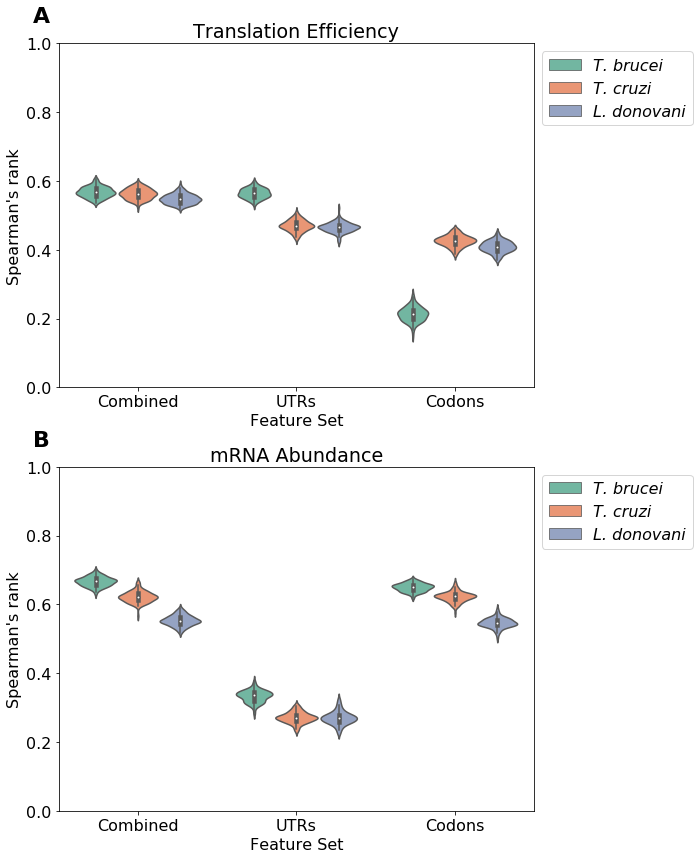

In [14]:
plt.rcParams.update({'font.size': 16})
fig,axes=plt.subplots( figsize=(10,12) , nrows=2)

ax = axes[0]
sns.violinplot(
    data=model_te,
    x='Features',
    y='Sp',
    hue='analysis_sp',
    #split=True,
    ax=ax,
    palette='Set2'
   
)
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax.set_ylim(0,1)
#ax.set_xticklabels(['T. brucei','T. cruzi','L. donovani'], style='italic')
ax.set_xlabel("Feature Set")
ax.set_ylabel("Spearman's rank")
legend = ax.get_legend()
for t in legend.get_texts():
    if t.get_text() == 'TB':
        t.set_text('T. brucei')
    if t.get_text() == 'TC':
        t.set_text('T. cruzi') 
    if t.get_text() == 'LD':
        t.set_text('L. donovani')         
    t.set_style('italic')
ax.set_title('Translation Efficiency')


ax=axes[1]
sns.violinplot(
    data=model_ab,
    x='Features',
    y='Sp',
    hue='analysis_sp',
    #split=True,
    ax=ax,
    palette='Set2'
   
)
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax.set_ylim(0,1)
ax.set_xlabel("Feature Set")
ax.set_ylabel("Spearman's rank")
legend = ax.get_legend()
for t in legend.get_texts():
    if t.get_text() == 'TB':
        t.set_text('T. brucei')
    if t.get_text() == 'TC':
        t.set_text('T. cruzi') 
    if t.get_text() == 'LD':
        t.set_text('L. donovani')         
    t.set_style('italic')
ax.set_title('mRNA Abundance')

fig.text(0.06, 0.98,  'A', fontsize=22, weight='bold')
fig.text(0.06, 0.49,  'B', fontsize=22, weight='bold')
plt.tight_layout()

plt.savefig('Figure_6.png', bbox_inches='tight', dpi=300)
plt.savefig('Figure_6.svg', bbox_inches='tight')
plt.show()

In [15]:
model_te = pd.concat([
    
    pd.read_csv('TB/stats_TB_TE_All.csv',index_col=[0]),
    pd.read_csv('TB/stats_TB_TE_utr.csv',index_col=[0]),
    pd.read_csv('TB/stats_TB_TE_codon.csv',index_col=[0]),

    pd.read_csv('TB_pcf/stats_TB_TE_All.csv',index_col=[0]),
    pd.read_csv('TB_pcf/stats_TB_TE_utr.csv',index_col=[0]),
    pd.read_csv('TB_pcf/stats_TB_TE_codon.csv',index_col=[0]),      
    
    pd.read_csv('TC/stats_TC_TE_All.csv',index_col=[0]),
    pd.read_csv('TC/stats_TC_TE_utr.csv',index_col=[0]),
    pd.read_csv('TC/stats_TC_TE_codon.csv',index_col=[0]),    
    
    pd.read_csv('LD/stats_LD_TE_All.csv',index_col=[0]),
    pd.read_csv('LD/stats_LD_TE_utr.csv',index_col=[0]),
    pd.read_csv('LD/stats_LD_TE_codon.csv',index_col=[0])]
       
)
model_te.head()
model_te=model_te.rename({'analysis_type':'Features'},axis=1)
model_te['Features']=model_te['Features'].map({'TE_utr':'UTRs','TE_codon':'Codons','TE_All':'Combined'})
model_te.head()

,R2,mse,Pr,Sp,D2,Ci,mape,n_rmse,Kn,analysis_sp,Features
0,0.330934,0.019525,0.607604,0.555688,0.179206,0.695880,35.284980,0.315251,0.391760,TB,Combined
1,0.336749,0.019804,0.619056,0.559101,0.175735,0.697405,35.022896,0.315820,0.394809,TB,Combined
2,0.339588,0.020192,0.634312,0.582528,0.183288,0.706752,38.497561,0.322490,0.413505,TB,Combined
3,0.319643,0.020396,0.608098,0.558427,0.167488,0.696242,36.139237,0.324312,0.392484,TB,Combined
4,0.342954,0.020236,0.623963,0.582324,0.189691,0.707036,40.635369,0.319666,0.414072,TB,Combined


In [16]:
model_ab = pd.concat([
    
    pd.read_csv('TB/stats_TB_Abundance_All.csv',index_col=[0]),
    pd.read_csv('TB/stats_TB_Abundance_utr.csv',index_col=[0]),
    pd.read_csv('TB/stats_TB_Abundance_codon.csv',index_col=[0]),
    
    pd.read_csv('TB_pcf/stats_TB_Abundance_All.csv',index_col=[0]),
    pd.read_csv('TB_pcf/stats_TB_Abundance_utr.csv',index_col=[0]),
    pd.read_csv('TB_pcf/stats_TB_Abundance_codon.csv',index_col=[0]),    
    
    pd.read_csv('TC/stats_TC_Abundance_All.csv',index_col=[0]),
    pd.read_csv('TC/stats_TC_Abundance_utr.csv',index_col=[0]),
    pd.read_csv('TC/stats_TC_Abundance_codon.csv',index_col=[0]),    
    
    pd.read_csv('LD/stats_LD_Abundance_All.csv',index_col=[0]),
    pd.read_csv('LD/stats_LD_Abundance_utr.csv',index_col=[0]),
    pd.read_csv('LD/stats_LD_Abundance_codon.csv',index_col=[0])]
    
    
)
model_ab.head()
model_ab=model_ab.rename({'analysis_type':'Features'},axis=1)
model_ab['Features']=model_ab['Features'].map({'Abundance_utr':'UTRs','Abundance_codon':'Codons','Abundance_All':'Combined'})
model_ab.head()


,R2,mse,Pr,Sp,D2,Ci,mape,n_rmse,Kn,analysis_sp,Features
0,0.365706,0.104242,0.709946,0.657272,0.184779,0.740178,12.908720,0.168986,0.480356,TB,Combined
1,0.397298,0.092027,0.718243,0.651802,0.201169,0.737140,12.431493,0.159275,0.474280,TB,Combined
2,0.406931,0.091787,0.735968,0.675117,0.205861,0.748847,12.183273,0.157935,0.497695,TB,Combined
3,0.390733,0.094346,0.717780,0.661503,0.198427,0.741850,12.438714,0.159925,0.483701,TB,Combined
4,0.399303,0.091319,0.740787,0.676842,0.197193,0.748241,12.505854,0.158810,0.496482,TB,Combined


In [17]:
model_ab['analysis_sp'].unique()

array(['TB', 'TBpcf', 'TC', 'LD'], dtype=object)

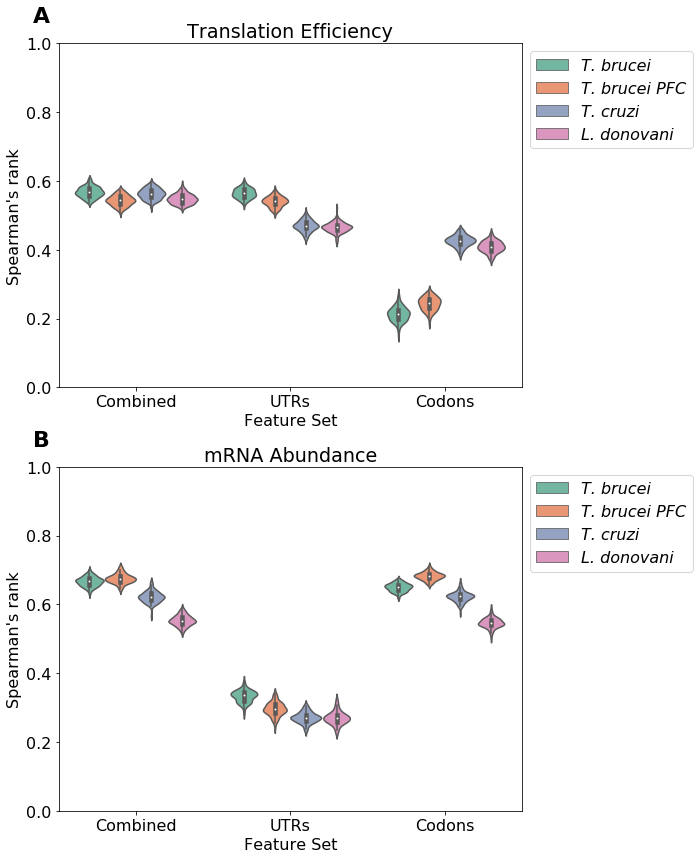

In [18]:
plt.rcParams.update({'font.size': 16})
fig,axes=plt.subplots( figsize=(10,12) , nrows=2)

ax = axes[0]
sns.violinplot(
    data=model_te,
    x='Features',
    y='Sp',
    hue='analysis_sp',
    #split=True,
    ax=ax,
    palette='Set2'
   
)
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax.set_ylim(0,1)
#ax.set_xticklabels(['T. brucei','T. cruzi','L. donovani'], style='italic')
ax.set_xlabel("Feature Set")
ax.set_ylabel("Spearman's rank")
legend = ax.get_legend()
for t in legend.get_texts():
    if t.get_text() == 'TB':
        t.set_text('T. brucei')
    if t.get_text() == 'TBpcf':
        t.set_text('T. brucei PFC')        
    if t.get_text() == 'TC':
        t.set_text('T. cruzi') 
    if t.get_text() == 'LD':
        t.set_text('L. donovani')         
    t.set_style('italic')
ax.set_title('Translation Efficiency')


ax=axes[1]
sns.violinplot(
    data=model_ab,
    x='Features',
    y='Sp',
    hue='analysis_sp',
    #split=True,
    ax=ax,
    palette='Set2'
   
)
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax.set_ylim(0,1)
ax.set_xlabel("Feature Set")
ax.set_ylabel("Spearman's rank")
legend = ax.get_legend()
for t in legend.get_texts():
    if t.get_text() == 'TB':
        t.set_text('T. brucei')
    if t.get_text() == 'TBpcf':
        t.set_text('T. brucei PFC')         
    if t.get_text() == 'TC':
        t.set_text('T. cruzi') 
    if t.get_text() == 'LD':
        t.set_text('L. donovani')         
    t.set_style('italic')
ax.set_title('mRNA Abundance')

fig.text(0.06, 0.98,  'A', fontsize=22, weight='bold')
fig.text(0.06, 0.49,  'B', fontsize=22, weight='bold')
plt.tight_layout()
plt.show()

In [19]:
from PIL import Image
import io
import numpy as np

def concatenate_figures_vertically(figure_paths, output_path, padding=0):
    """
    Concatenate multiple figures vertically and save the result.
    
    Parameters:
    -----------
    figure_paths : list
        List of paths to the input figures (PNG or SVG)
    output_path : str
        Path where to save the concatenated figure
    padding : int, optional
        Padding between figures in pixels (default 0)
    """
    # List to store all images
    images = []
    
    # Maximum width found
    max_width = 0
    total_height = 0
    
    # Load and convert all images
    for path in figure_paths:
        img = Image.open(path)
            
        # Convert to RGB if necessary
        if img.mode != 'RGB':
            img = img.convert('RGB')
            
        images.append(img)
        max_width = max(max_width, img.width)
        total_height += img.height
    
    # Add padding to total height
    total_height += padding * (len(images) - 1)
    
    # Create new image
    result = Image.new('RGB', (max_width, total_height), 'white')
    
    # Paste images
    current_height = 0
    for img in images:
        # Center image horizontally if smaller than max width
        x_offset = (max_width - img.width) // 2
        result.paste(img, (x_offset, current_height))
        current_height += img.height + padding
    
    # Save result
    result.save(output_path)
    return result



In [20]:
# Example usage:
figure_paths = [
    'TB/Tb_TE.png',
    'TC/Tc_TE.png',
    'LD/Ld_TE.png'
]
output_path = 'Figure_2.png'
concatenated = concatenate_figures_vertically(figure_paths, output_path, padding=20)

In [21]:
# Example usage:
figure_paths = [
    'TB_pcf/Tb_TE.png',
    'TB_pcf/Tb_mRNA_Abundance.png',

]
output_path = 'Figure_3.png'
concatenated = concatenate_figures_vertically(figure_paths, output_path, padding=20)

In [22]:
# Example usage:
figure_paths = [
    'TB/Tb_Interctions.png',
    'TC/Tc_Interctions.png',
    'LD/Ld_Interctions.png'

]
output_path = 'Figure_4.png'
concatenated = concatenate_figures_vertically(figure_paths, output_path, padding=20)

In [23]:
# Example usage:
figure_paths = [
    'TB/Tb_mRNA_Abundance.png',
    'TC/Tc_mRNA_Abundance.png',
    'LD/Ld_mRNA_Abundance.png'

]
output_path = 'Figure_5.png'
concatenated = concatenate_figures_vertically(figure_paths, output_path, padding=20)